In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data

In [172]:
path = str(Path().resolve()) + '/data/'
applications_approved = pd.read_csv(path + 'approved_application_data.csv')
applications_rejected = pd.read_csv(path + 'rejected_application_data.csv')

In [173]:
applications_approved = applications_approved.rename(columns = {'Unnamed: 0' : 'id'})
applications_rejected = applications_rejected.rename(columns = {'Unnamed: 0' : 'id'})

# Data exploration

In [94]:
applications_approved.describe()

,id,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,days_since_most_recent_payroll,days_until_next_payroll,bank_balance,overdraft_transactions,nsf_transactions,return_transactions,reverse_transactions,length_of_transaction_history,mortgage,auto_loan,student_loan,traditional_single_payment,installment_loan,predatory_installment_loan,title_loan,pay_advances,total_loan_payments,no_of_other_active_loans,traditional_single_payment_mean,traditional_single_payment_trend,loan_amount,loan_requested,status
count,4145.000000,4145.000000,4145.000000,4145.000000,4145.00000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000
mean,2072.000000,2795.329450,6.252843,68.887422,437.99492,9.712636,140.729628,35.254914,135.115561,4.072261,1.821230,5.517491,4.850663,226.045887,1.342823,1.117250,0.558504,0.244873,168.739445,9.297764,33.267066,3.455163,38.845916,35.820069,23.016399,0.725399,29.899090,213.542198,1.707841,0.461298,0.017937,187.334138,317.778046,0.800241
std,1196.702762,2500.304614,51.266176,184.837526,460.51468,67.448255,369.385895,241.904024,89.434786,4.337867,1.128403,9.096424,5.303314,1285.698639,3.754272,3.375296,2.321840,1.193456,88.628117,111.967220,122.803512,25.329346,135.003918,118.259035,110.063014,13.808910,86.752272,403.562426,1.733944,1.230599,0.391227,70.422474,137.994972,0.399867
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-7.000000,-890.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.500000,50.000000,50.000000,0.000000
25%,1036.000000,1525.800000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,70.000000,2.000000,1.000000,1.000000,0.000000,0.570000,0.000000,0.000000,0.000000,0.000000,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,200.000000,1.000000
50%,2072.000000,2367.330000,0.000000,0.000000,391.38500,0.000000,0.000000,0.000000,144.000000,3.000000,2.000000,4.000000,4.000000,25.490000,0.000000,0.000000,0.000000,0.000000,178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.500000,1.000000,0.000000,0.000000,200.000000,255.000000,1.000000
75%,3108.000000,3519.960000,0.000000,50.000000,661.14250,0.000000,0.000000,0.000000,176.000000,4.833333,2.000000,8.000000,8.000000,223.780000,1.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,277.500000,2.000000,0.000000,0.000000,250.000000,500.000000,1.000000
max,4144.000000,88818.140000,1175.795000,2798.875000,6498.49250,1238.475000,10070.425000,10599.782500,452.000000,107.538095,17.000000,304.000000,74.000000,71249.610000,61.000000,65.000000,62.000000,28.000000,476.000000,2146.370000,1208.870000,557.350000,2115.000000,1219.800000,1550.000000,541.360000,900.000000,8804.070000,14.000000,20.333333,10.000000,500.000000,500.000000,1.000000


In [26]:
applications_approved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         4145 non-null   int64  
 1   monthly_income                     4145 non-null   float64
 2   gig_economy_weekly_income          4145 non-null   float64
 3   atm_check_deposits_weekly_income   4145 non-null   float64
 4   direct_deposit_weekly_income       4145 non-null   float64
 5   government_aid_weekly_income       4145 non-null   float64
 6   frequency_heuristic_weekly_income  4145 non-null   float64
 7   large_deposits_weekly_income       4145 non-null   float64
 8   income_length                      4145 non-null   int64  
 9   payrolls_per_month                 4145 non-null   float64
 10  income_sources                     4145 non-null   int64  
 11  days_since_most_recent_payroll     4145 non-null   int64

In [24]:
applications_approved[['income_length', 'monthly_income', 'income_sources',]].head()

,income_length,monthly_income,income_sources
0,174,881.44,1
1,206,1612.38,2
2,0,0.00,0
3,16,1510.51,1
4,131,620.00,5


## Sanity check

In [84]:
# Check for duplicates
print('Duplicates in approved loans DF',len(applications_approved[applications_approved.duplicated()]))
print('Duplicates in rejected loans DF',len(applications_rejected[applications_rejected.duplicated()]))

Duplicates in approved loans DF 0
Duplicates in rejected loans DF 0


## Univariate analysis

In [189]:
def make_barplot(df, var_gr, var_cnt): 
    '''df : categorical variable
    var_gr : our target categorical variable
    var_cnt: feature to count
    '''
    sns.set_style("white")
    datos_tot = df.groupby(var_gr, as_index=False)[var_cnt].count()
    datos_tot.sort_values(by=var_cnt, ascending= False, inplace = True)

    plot = sns.catplot(x = var_gr, y = var_cnt, kind="bar", 
                       data=datos_tot, palette="Set3",  height=6, aspect=2) 
    plot.fig.suptitle(f'Requests by {var_gr}')
    plt.show()

### Approved applications

Some of the features were binned for better visualization.

In [164]:
feat_list = ['income_sources', 'days_since_most_recent_payroll',
             'days_until_next_payroll', 'overdraft_transactions', 'nsf_transactions',
             'return_transactions', 'reverse_transactions', 
             'no_of_other_active_loans', 'state']

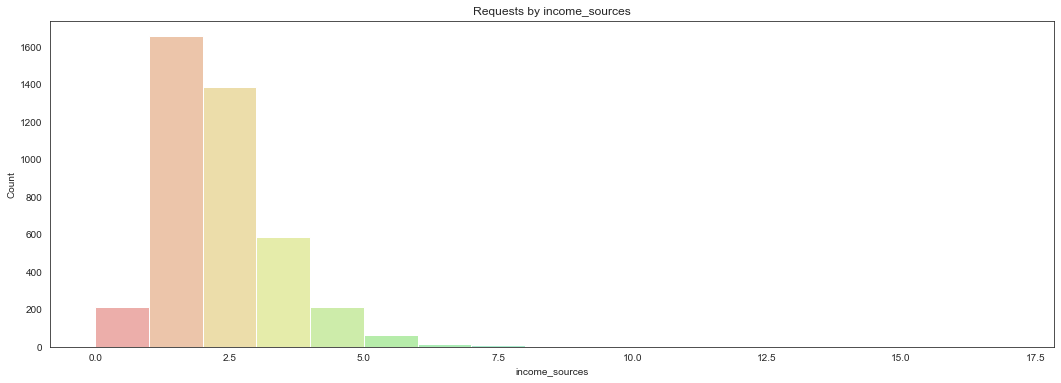

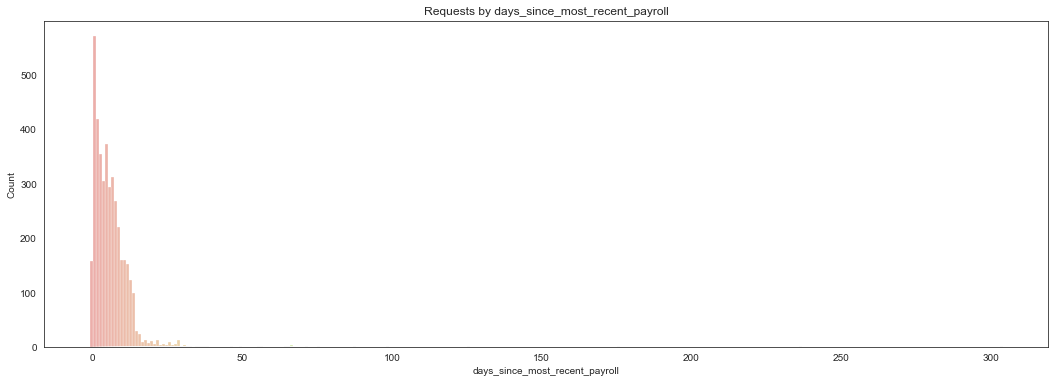

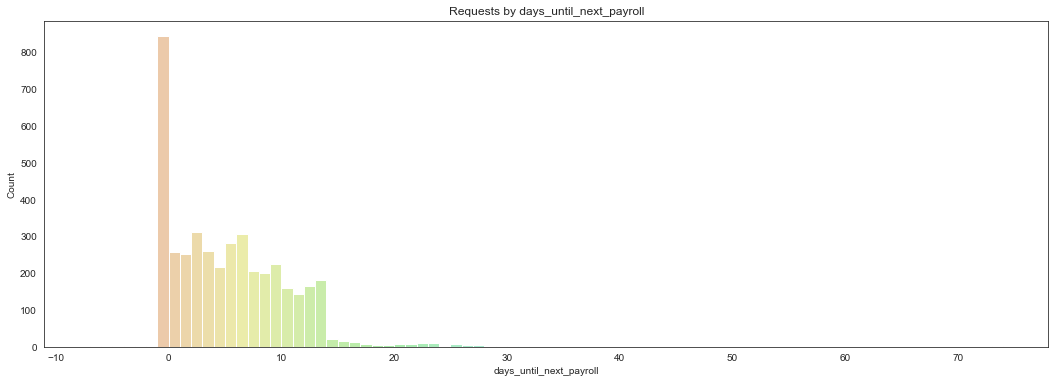

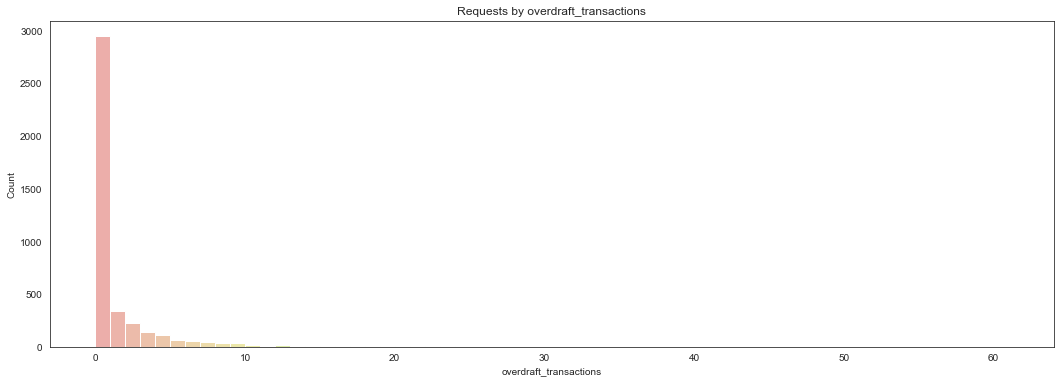

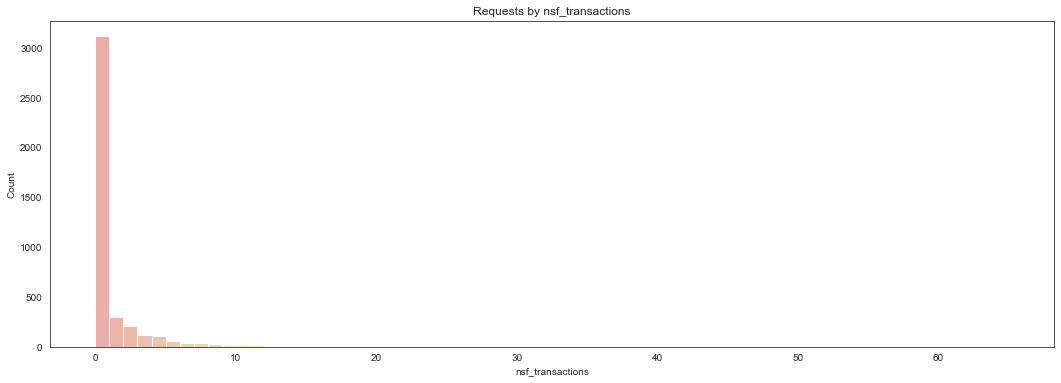

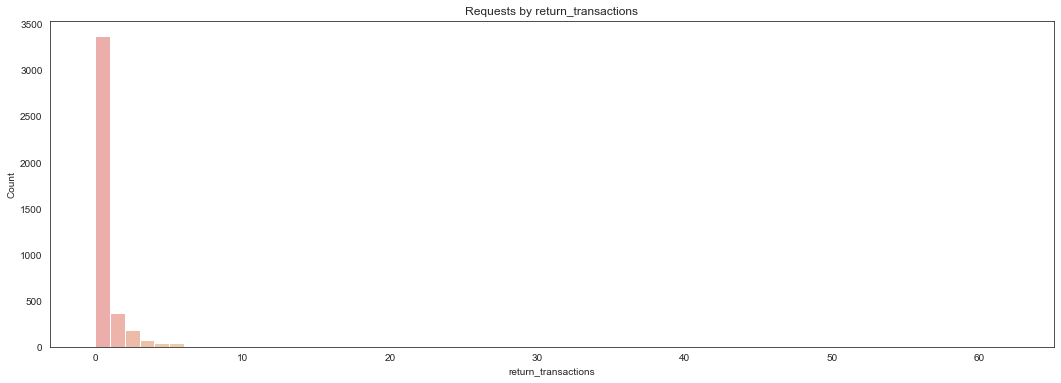

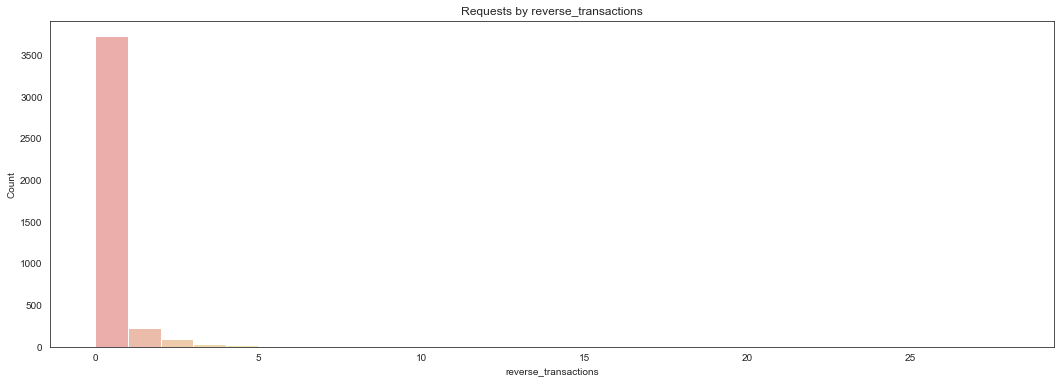

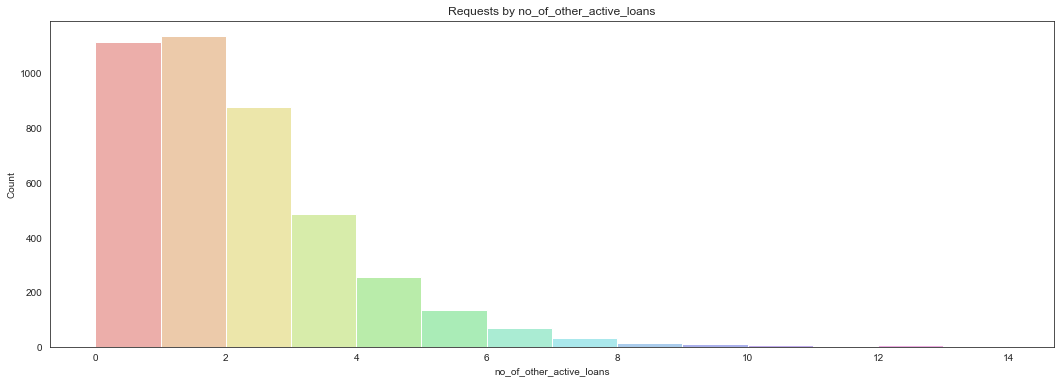

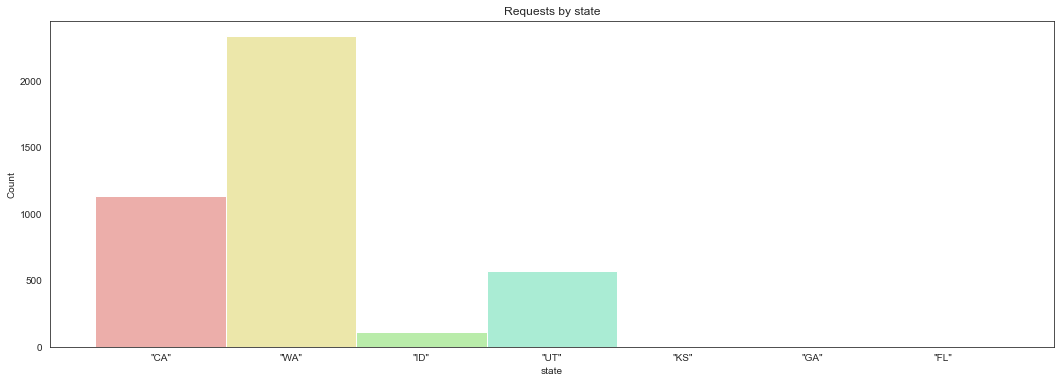

In [158]:
for i in feat_list:
    plt.figure(figsize=(18,6))
    sns.histplot(data=applications_approved, x=i, hue = i, 
                 binwidth= 1, palette = 'hls', legend = False).set(title = 'Requests by ' + i) # , 
    plt.show()

In [174]:
# get columns not previously plotted
cols = list(set(applications_approved.columns).difference(feat_list))

In [213]:
i = lst_bins[1]
applications_approved[i + '_labels'].value_counts(normalize=True)

0                    0.918938
(448.25, 700.0]      0.008444
(22.499, 67.685]     0.008203
(67.685, 95.0]       0.008203
(159.835, 228.36]    0.008203
(116.025, 137.5]     0.008203
(228.36, 300.0]      0.008203
(95.0, 116.025]      0.007961
(137.5, 159.835]     0.007961
(300.0, 448.25]      0.007961
(700.0, 1550.0]      0.007720
Name: predatory_installment_loan_bin_labels, dtype: float64

In [219]:

# get the rest of the columns into bins for better visualization
lst_bins = []
for i in cols: 
    if i != 'status': 
        applications_approved[i + '_bin_labels'] = pd.qcut(applications_approved[applications_approved[i] > 0][i], 
                                                           q = 10, duplicates = 'drop')
        applications_approved[i + '_bin'] = pd.qcut(applications_approved[applications_approved[i] > 0][i], labels = False,
                                                           q = 10, duplicates = 'drop')
        applications_approved[i + '_bin'] = np.where(applications_approved[i] == 0, '0', applications_approved[i + '_bin'])
        applications_approved[i + '_bin_labels'] = np.where(applications_approved[i] == 0, '0', applications_approved[i + '_bin_labels'])
        applications_approved[i + '_bin'] = applications_approved[i + '_bin'].apply(lambda x: str(x))
        lst_bins.append(i + '_bin')

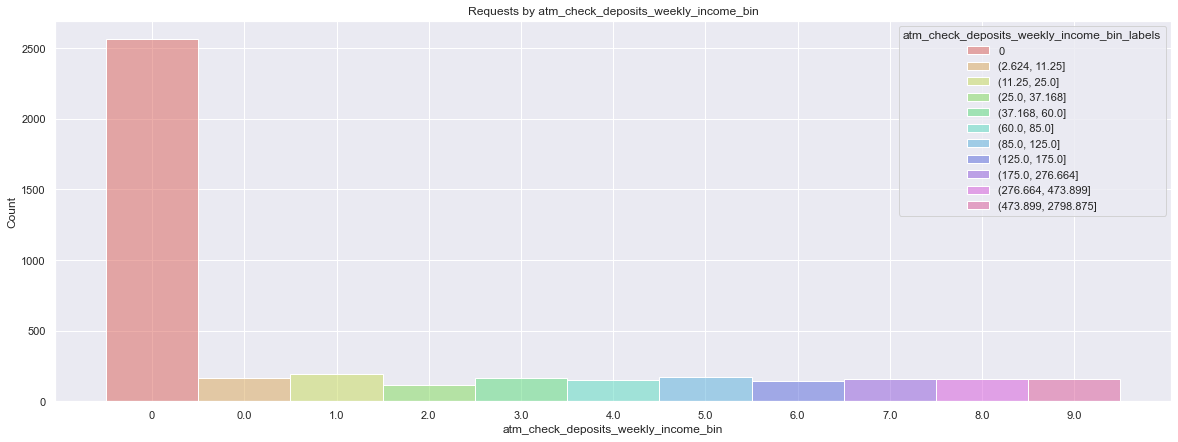

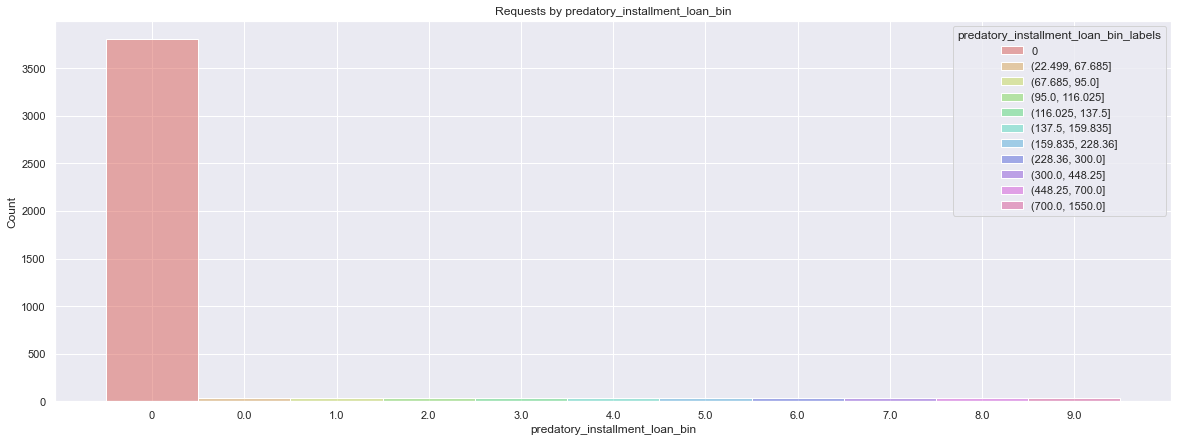

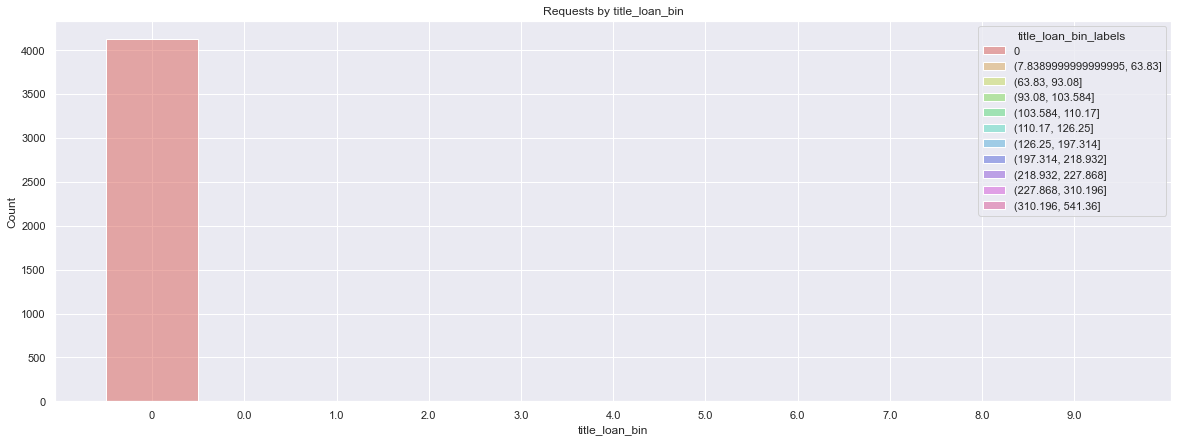

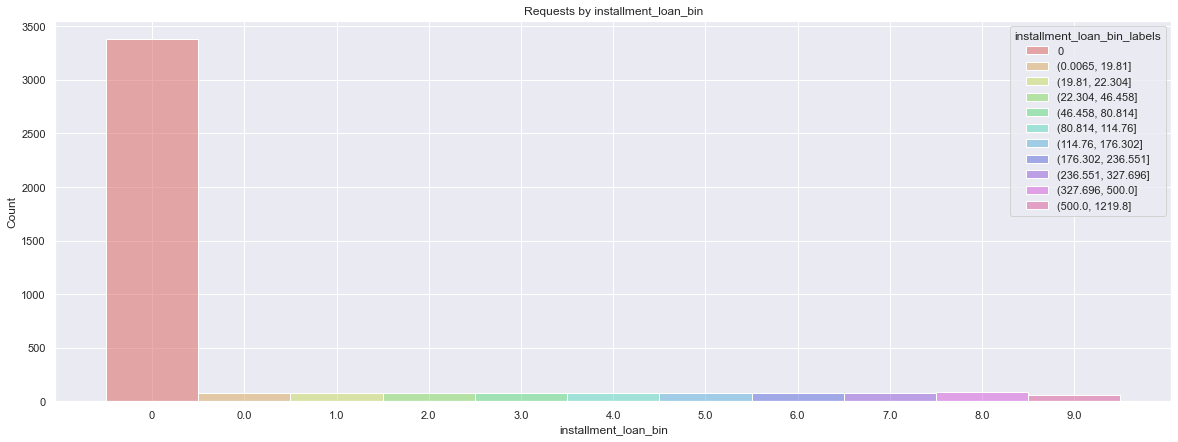

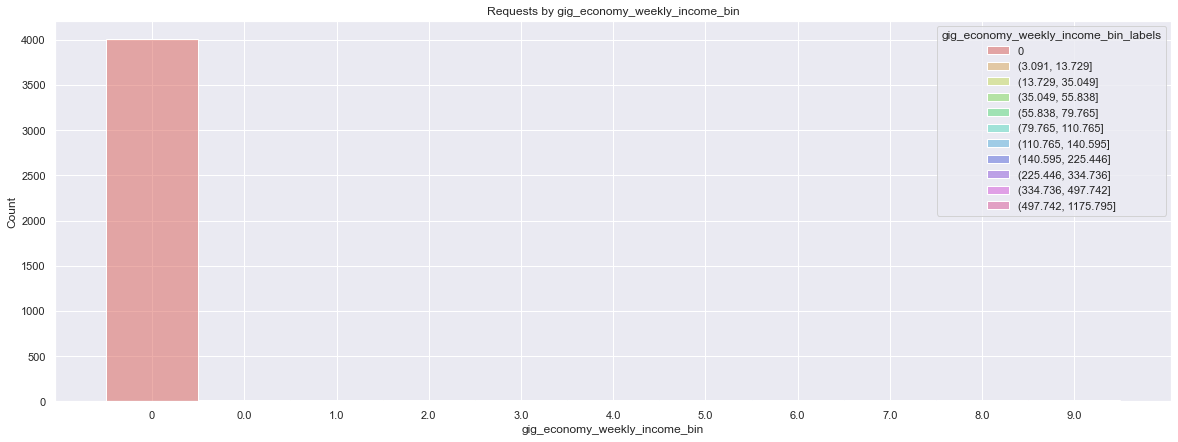

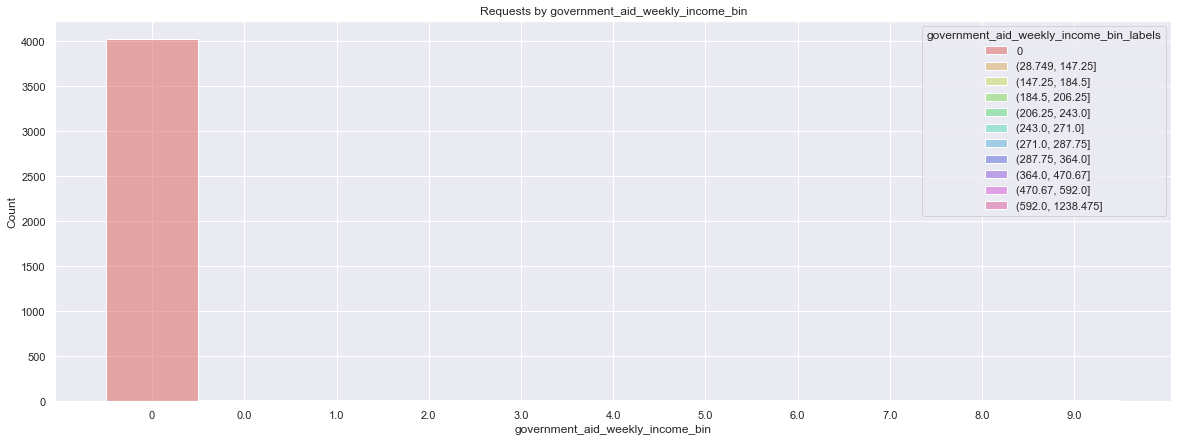

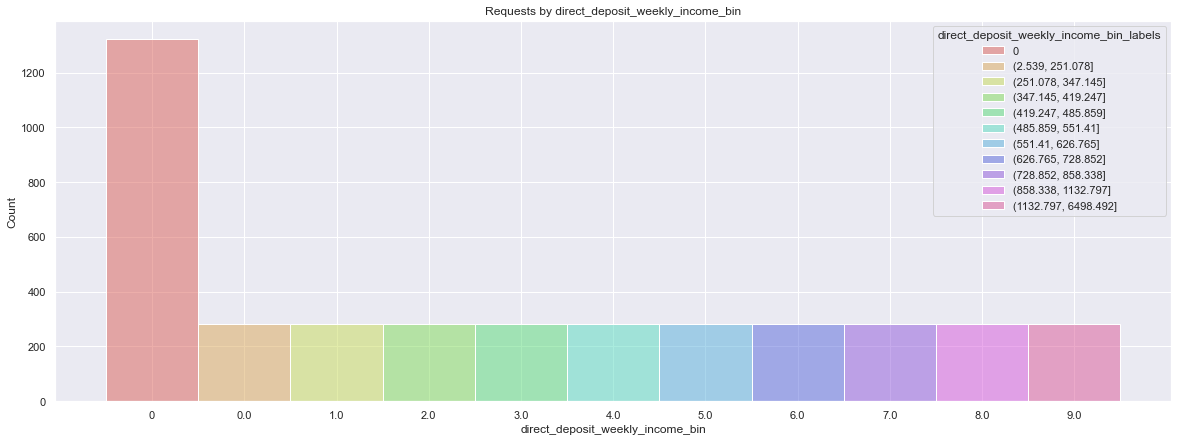

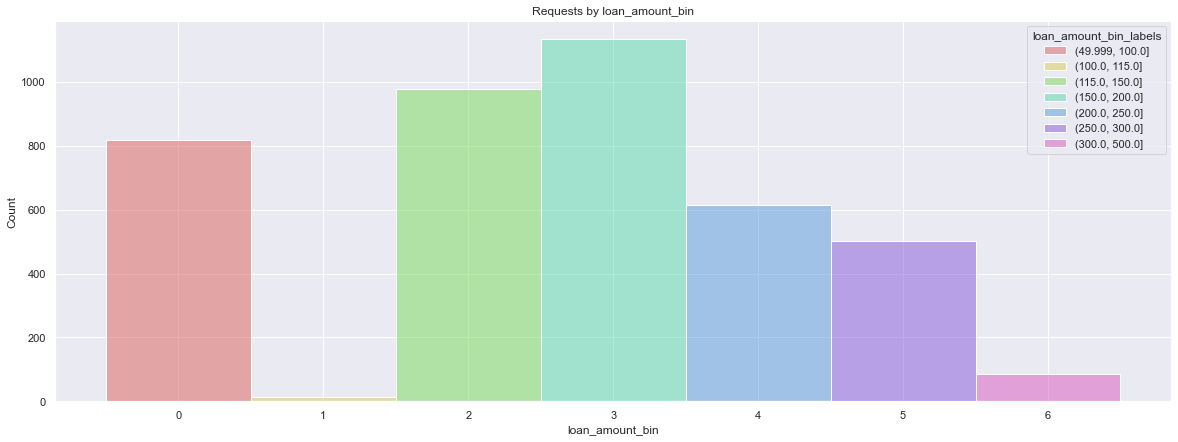

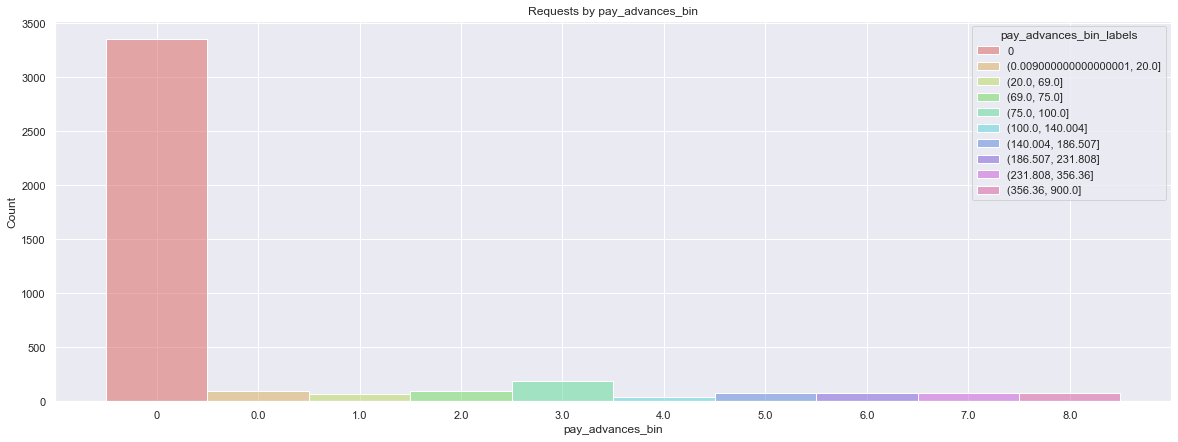

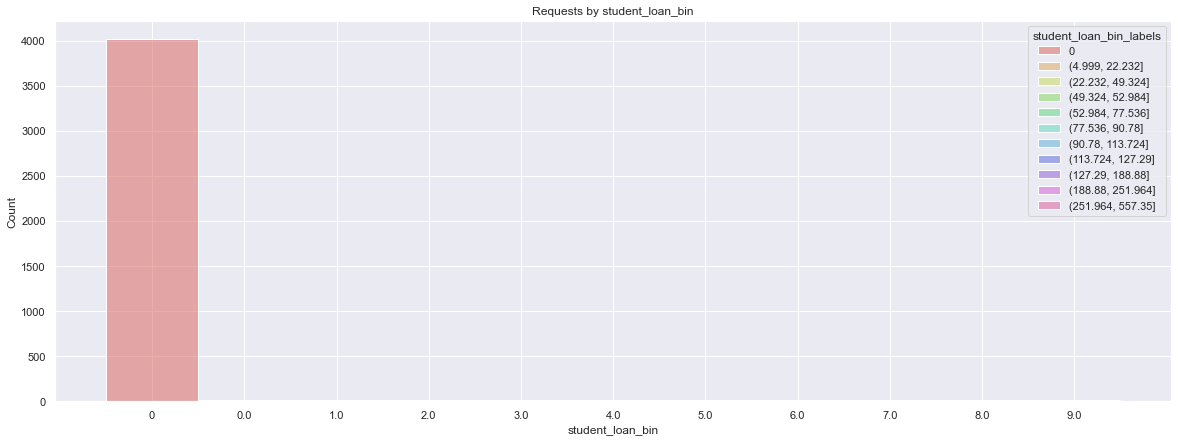

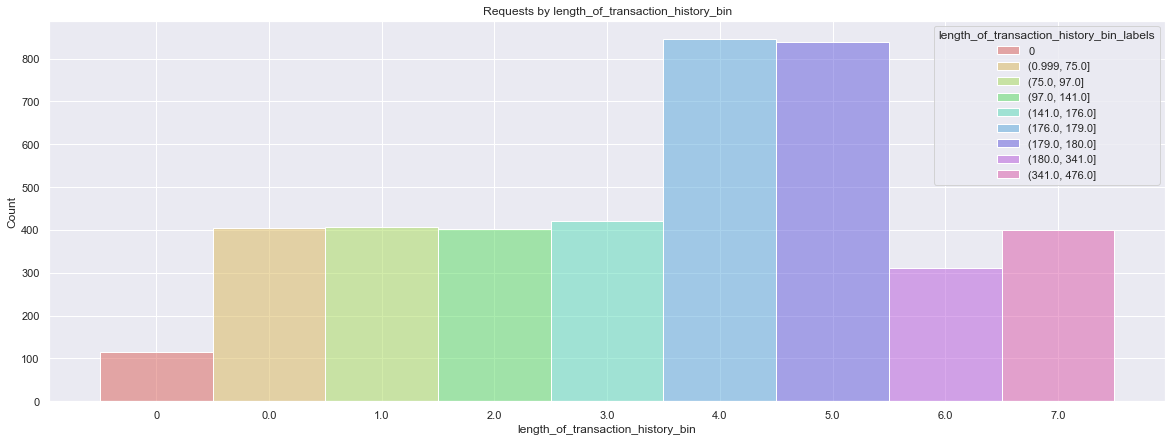

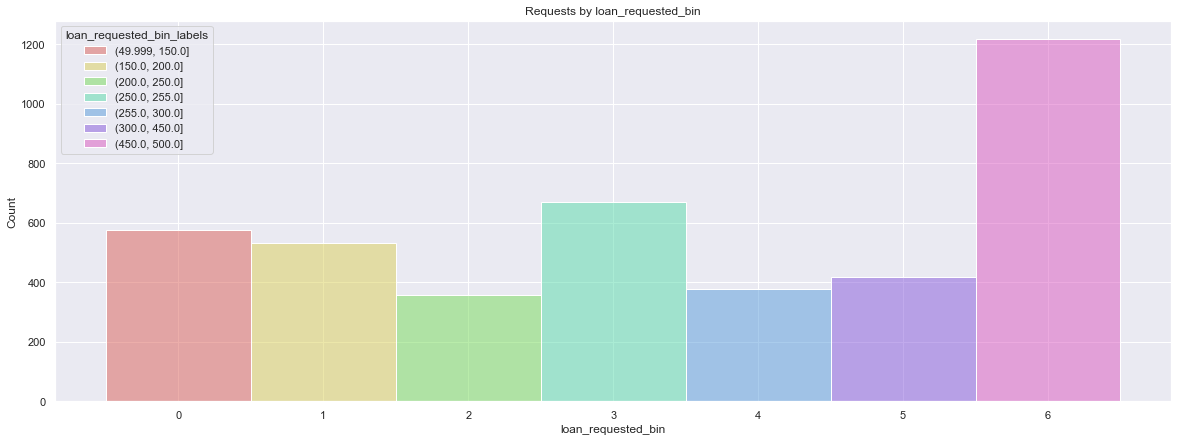

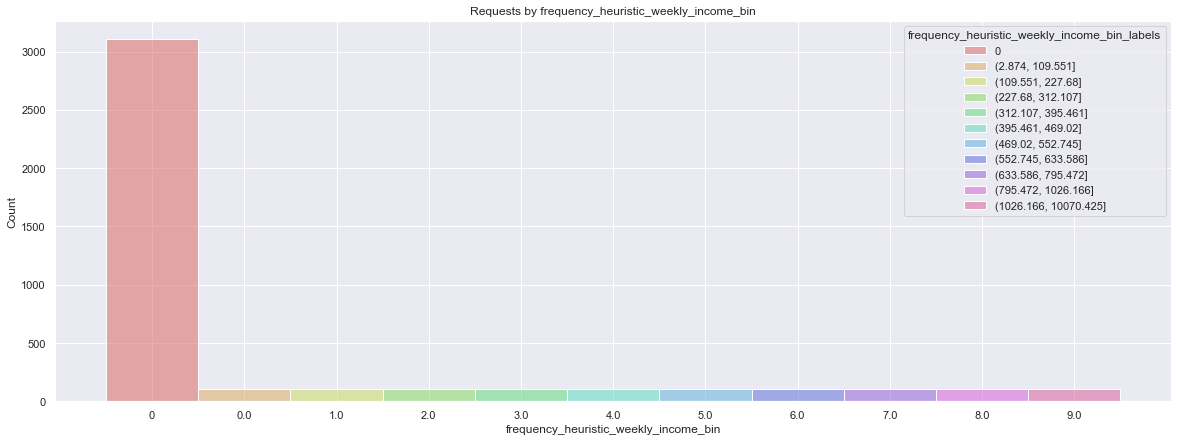

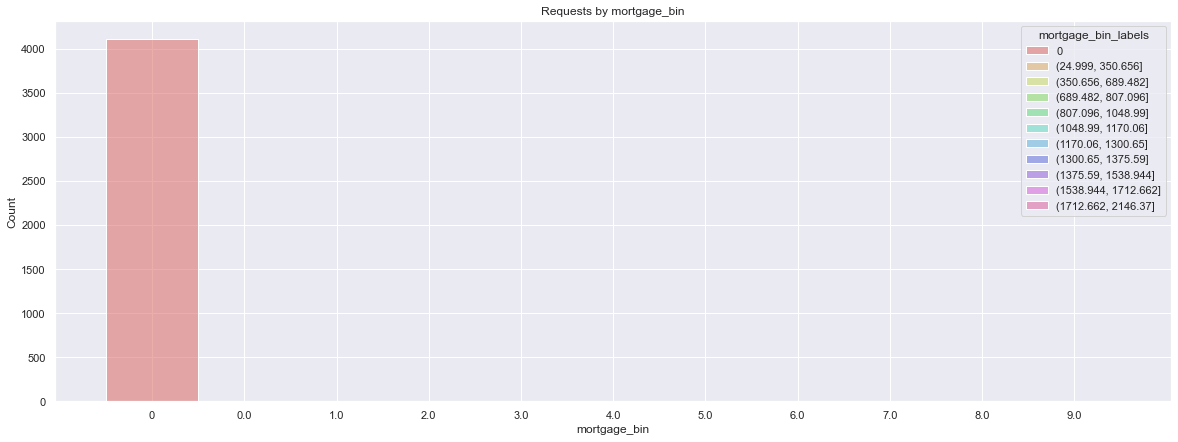

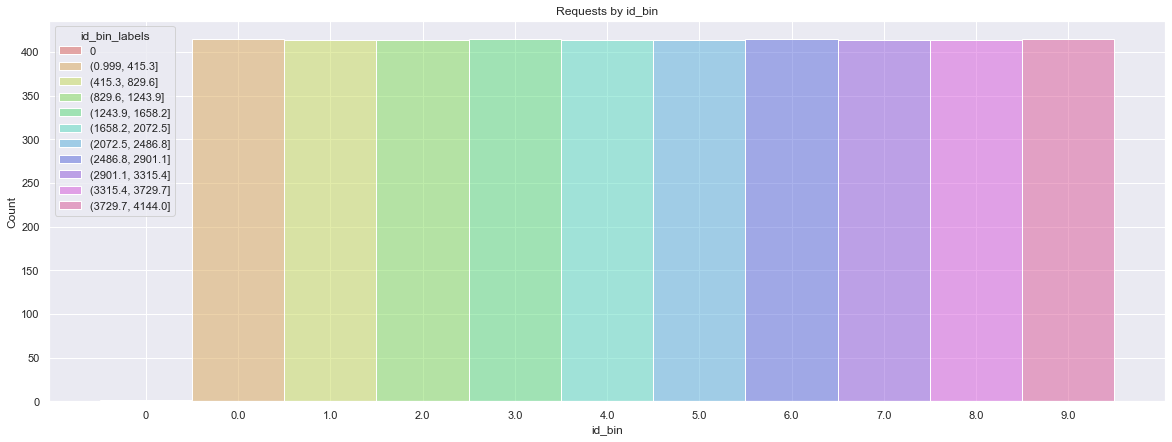

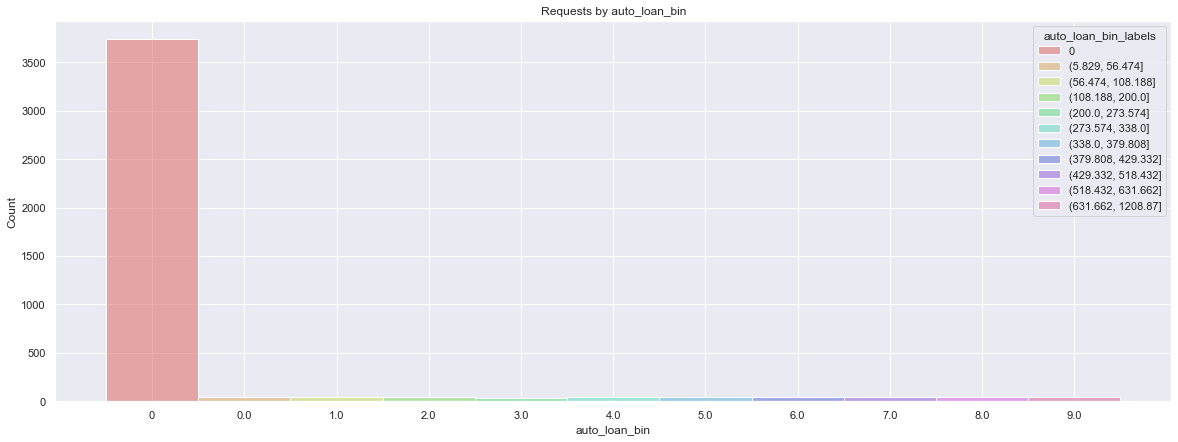

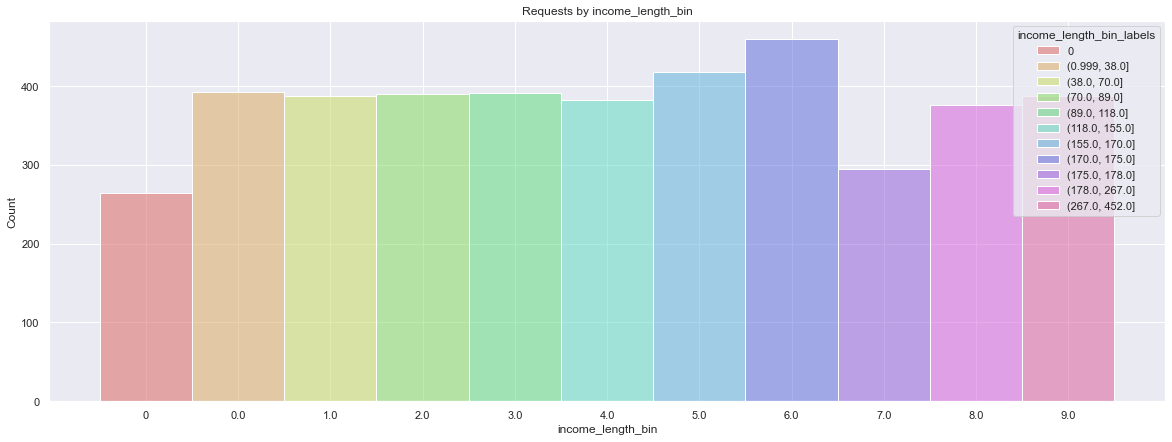

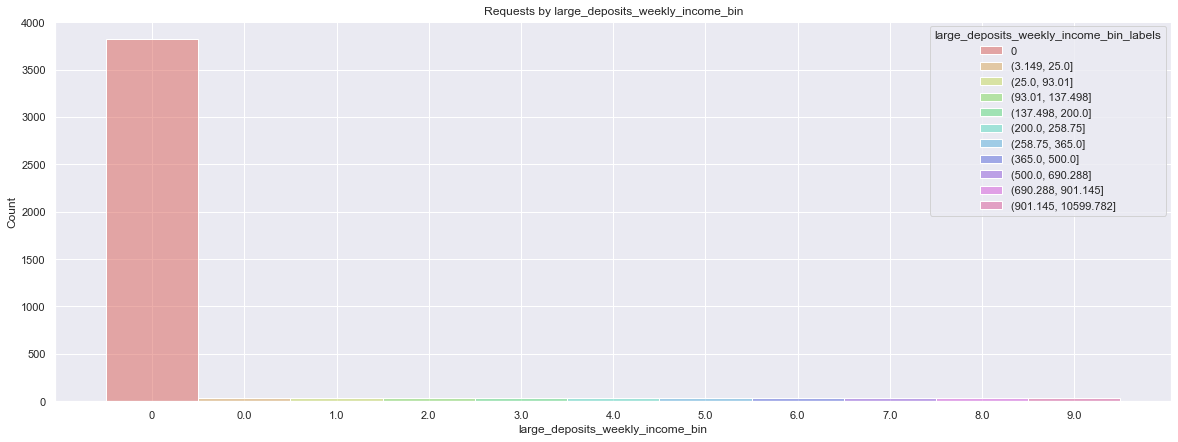

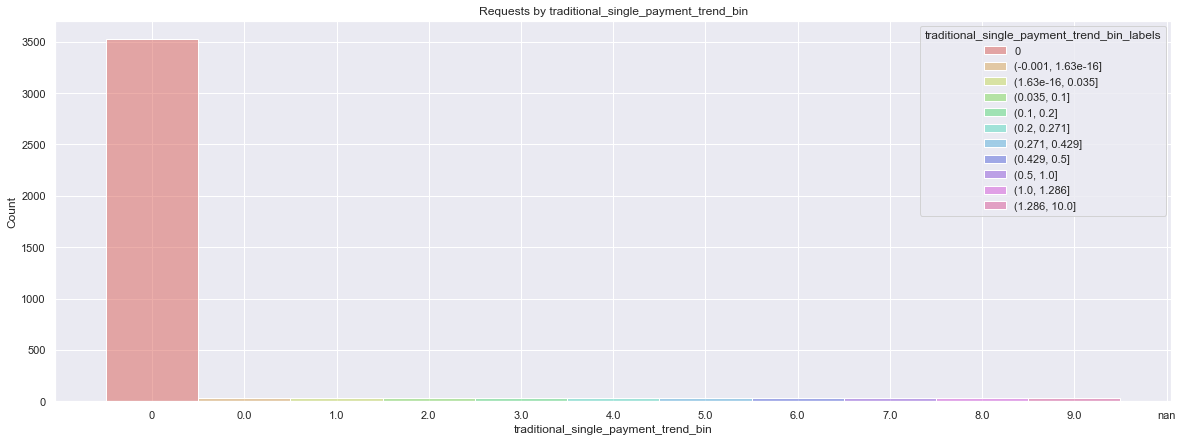

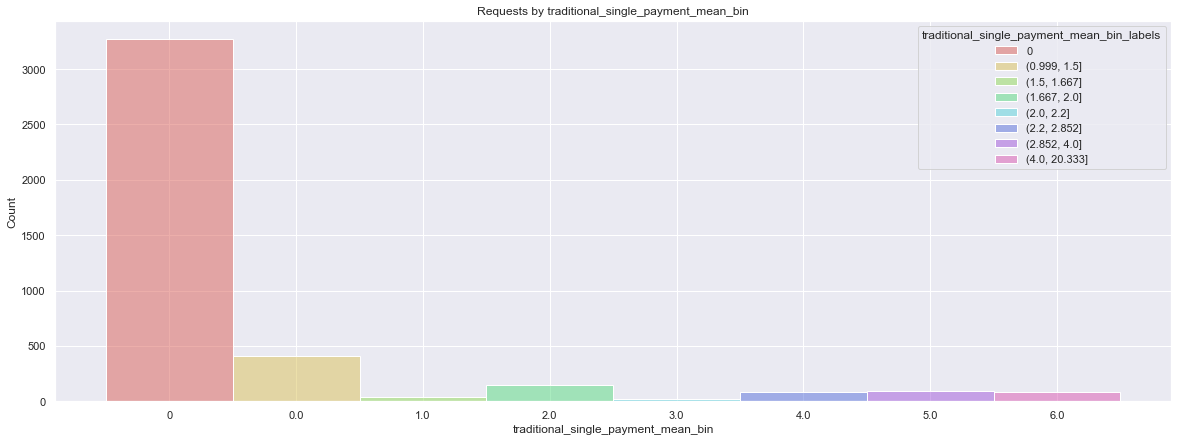

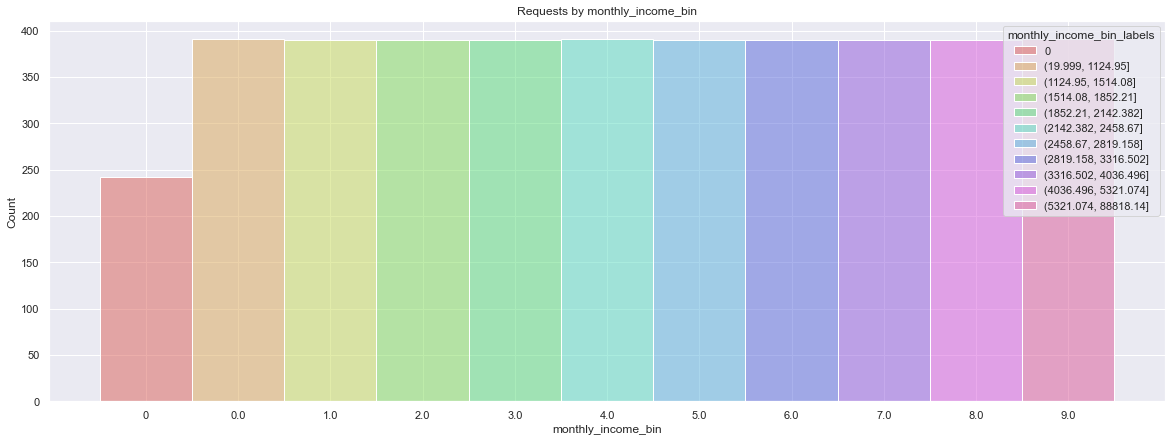

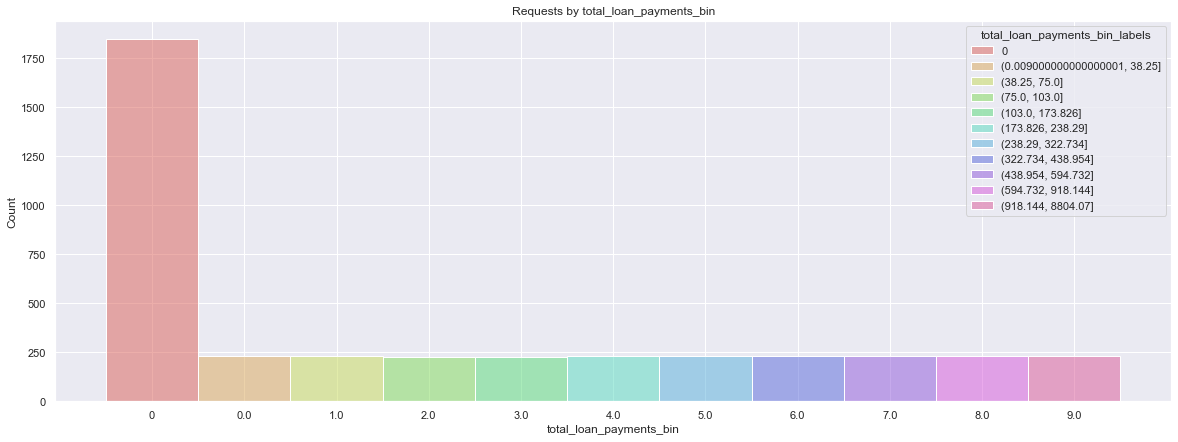

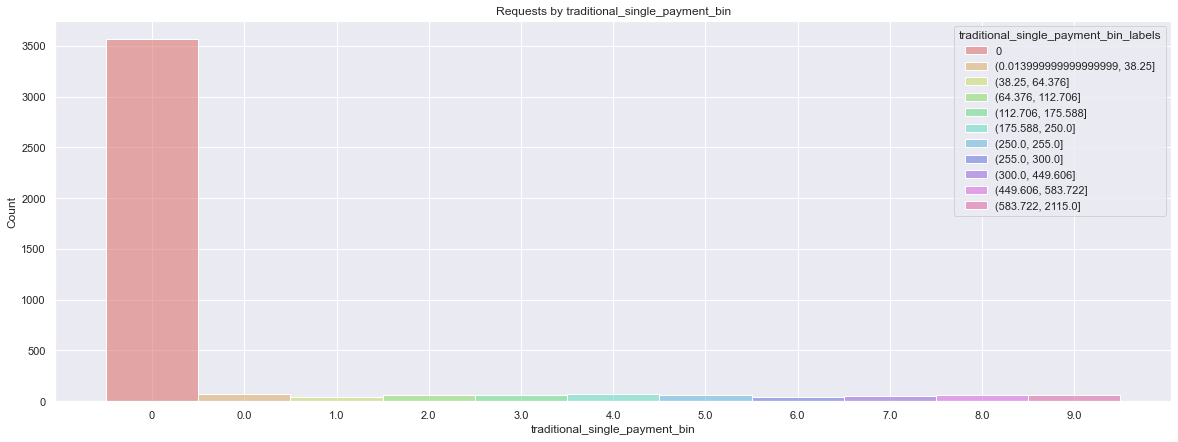

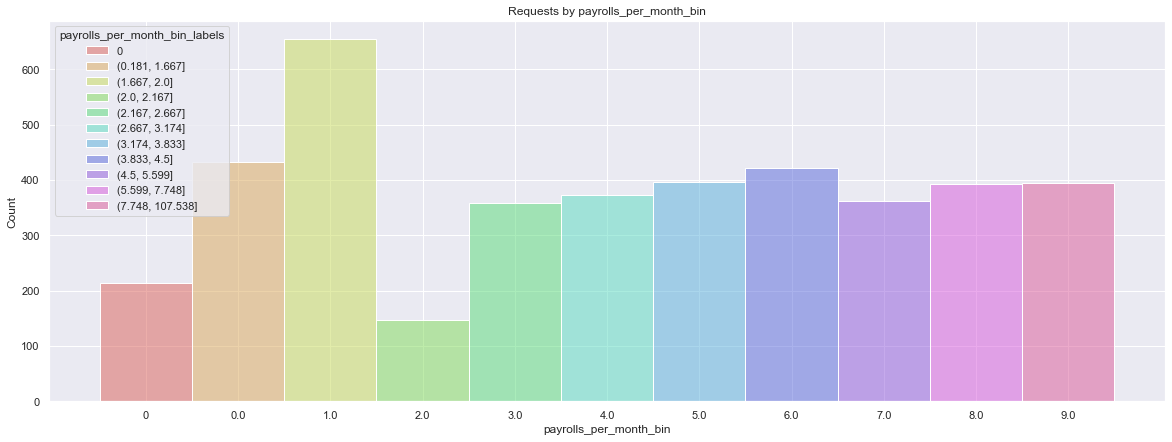

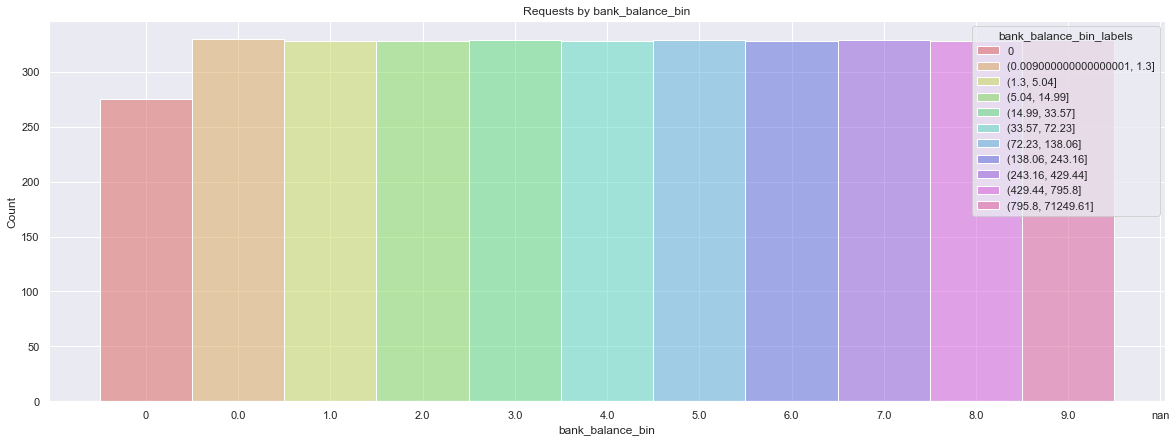

In [220]:
# plot remaining columns 
for i in lst_bins:
    sns.histplot(data=applications_approved.sort_values(by=i), x=i, hue = i + '_labels', 
                 binwidth= 1, palette = 'hls', legend = True).set(title = 'Requests by ' + i) # , 
    plt.show()

In [153]:
applications_approved[i].head()

0    (-2.799, 279.888]
1    (-2.799, 279.888]
2    (-2.799, 279.888]
3    (-2.799, 279.888]
4    (-2.799, 279.888]
Name: atm_check_deposits_weekly_income_bin, dtype: category
Categories (10, interval[float64, right]): [(-2.799, 279.888] < (279.888, 559.775] < (559.775, 839.662] < (839.662, 1119.55] ... (1679.325, 1959.212] < (1959.212, 2239.1] < (2239.1, 2518.987] < (2518.987, 2798.875]]

TypeError: Invalid object type at position 0

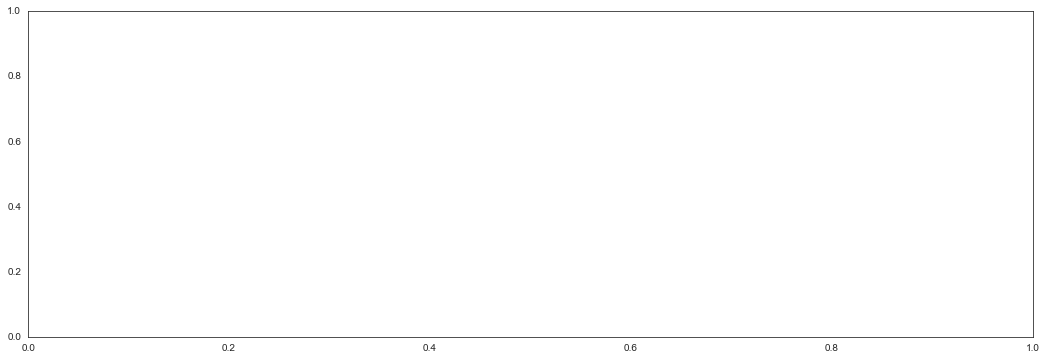

In [151]:
i = lst_bins[0]
plt.figure(figsize=(18,6))
sns.histplot(data=applications_approved, x=i, hue = i, 
                 binwidth= 1, palette = 'hls', legend = False).set(title = 'Requests by ' + i)  
plt.show()